# Exploratory Data Analysis on Titanic Data Set

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
titanic_df= pd.read_csv('titanic_train.csv')

In [84]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,37,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,37,0,0,111369,30.0000,C


In [51]:
titanic_df.head()   # display first 5 values of data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
titanic_df.dtypes  

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
titanic_df.isnull().sum()          #showing null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualizing Null Values

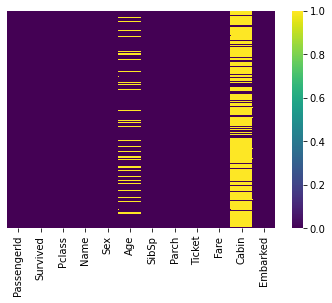

In [55]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap='viridis')

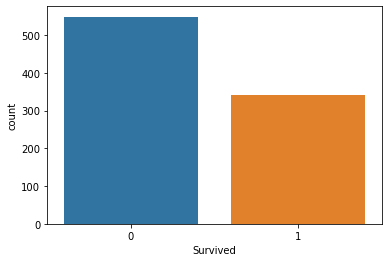

In [56]:
sns.countplot(x='Survived',data=titanic_df)

In [57]:
titanic_df['Survived'].value_counts()     # 0-->Not Survived  1---->Survived

0    549
1    342
Name: Survived, dtype: int64

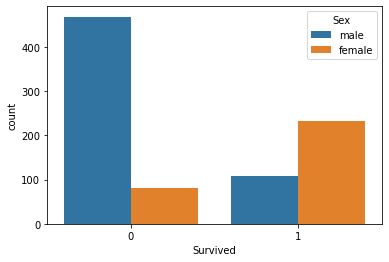

In [58]:
sns.countplot(x='Survived',data=titanic_df,hue='Sex')

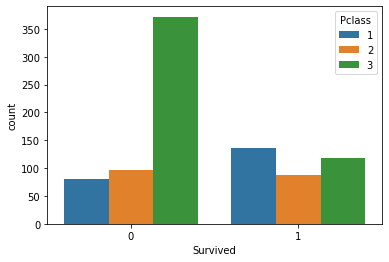

In [59]:
sns.countplot(x='Survived',data=titanic_df,hue='Pclass')

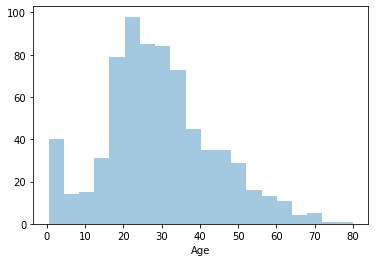

In [60]:
sns.distplot(titanic_df['Age'].dropna(),kde=False)

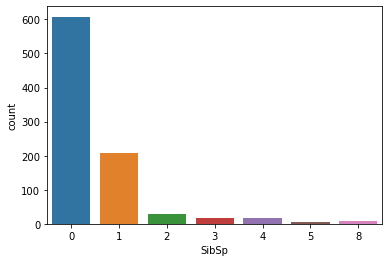

In [61]:
sns.countplot(data=titanic_df,x='SibSp')

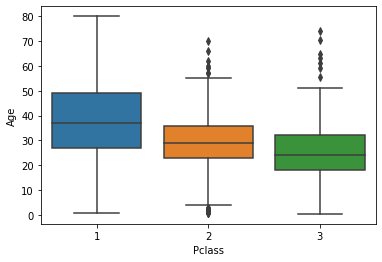

In [62]:
sns.boxplot(x='Pclass',y='Age',data=titanic_df)


# Dealing replacing Null values of Age Column with avg value of box plot

In [63]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
            
        if Pclass==2:
            return 29
        
        else:
            return 25
    else:
        return Age

In [70]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(input_age,axis=1)  # axix 0 ---->index  axix 1---->columns

# Visualizing Cleaned data frame

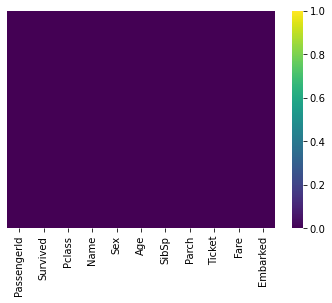

In [80]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap='viridis')

In [78]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [79]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [81]:
titanic_df.groupby('Sex')['Survived'].value_counts()     

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64